In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DO NOT CHANGE THE RANDOM SEEDS OR THE NUMBER OF PARTICLES!
## By trial and error I found a configuration that looked good.

In [2]:
np.random.seed(3) # this looks like particles don't overlap
n = 20
x = np.random.rand(n)
y = np.random.rand(n)
np.random.seed(3) # this looks like particles don't overlap
x = np.append(x,np.random.rand(n)-0.5)
x = np.append(x,np.random.rand(n)+0.5)
y = np.append(y,np.random.rand(2*n))
color = ['black' for i in range(3*n)]
color[0] = 'white'

def collide(xi,yi,x,y,r):
    # assumes that we only collide with at most one other obstacle
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            return True
    else: 
        return False
def computenewvelo(xi,yi,vx,vy,x,y,r):
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            break        
    # collides with (xj,yj)
    v1 = np.array([vx,vy])
    v2 = np.array([0.0,0.0])
    x1 = np.array([xi,yi])
    x2 = np.array([xj,yj])
    
    v1prime = v1 - 2*(x1-x2)*np.dot(v1-v2,x1-x2)/np.dot(x1-x2,x1-x2)
    return v1prime[0],v1prime[1]

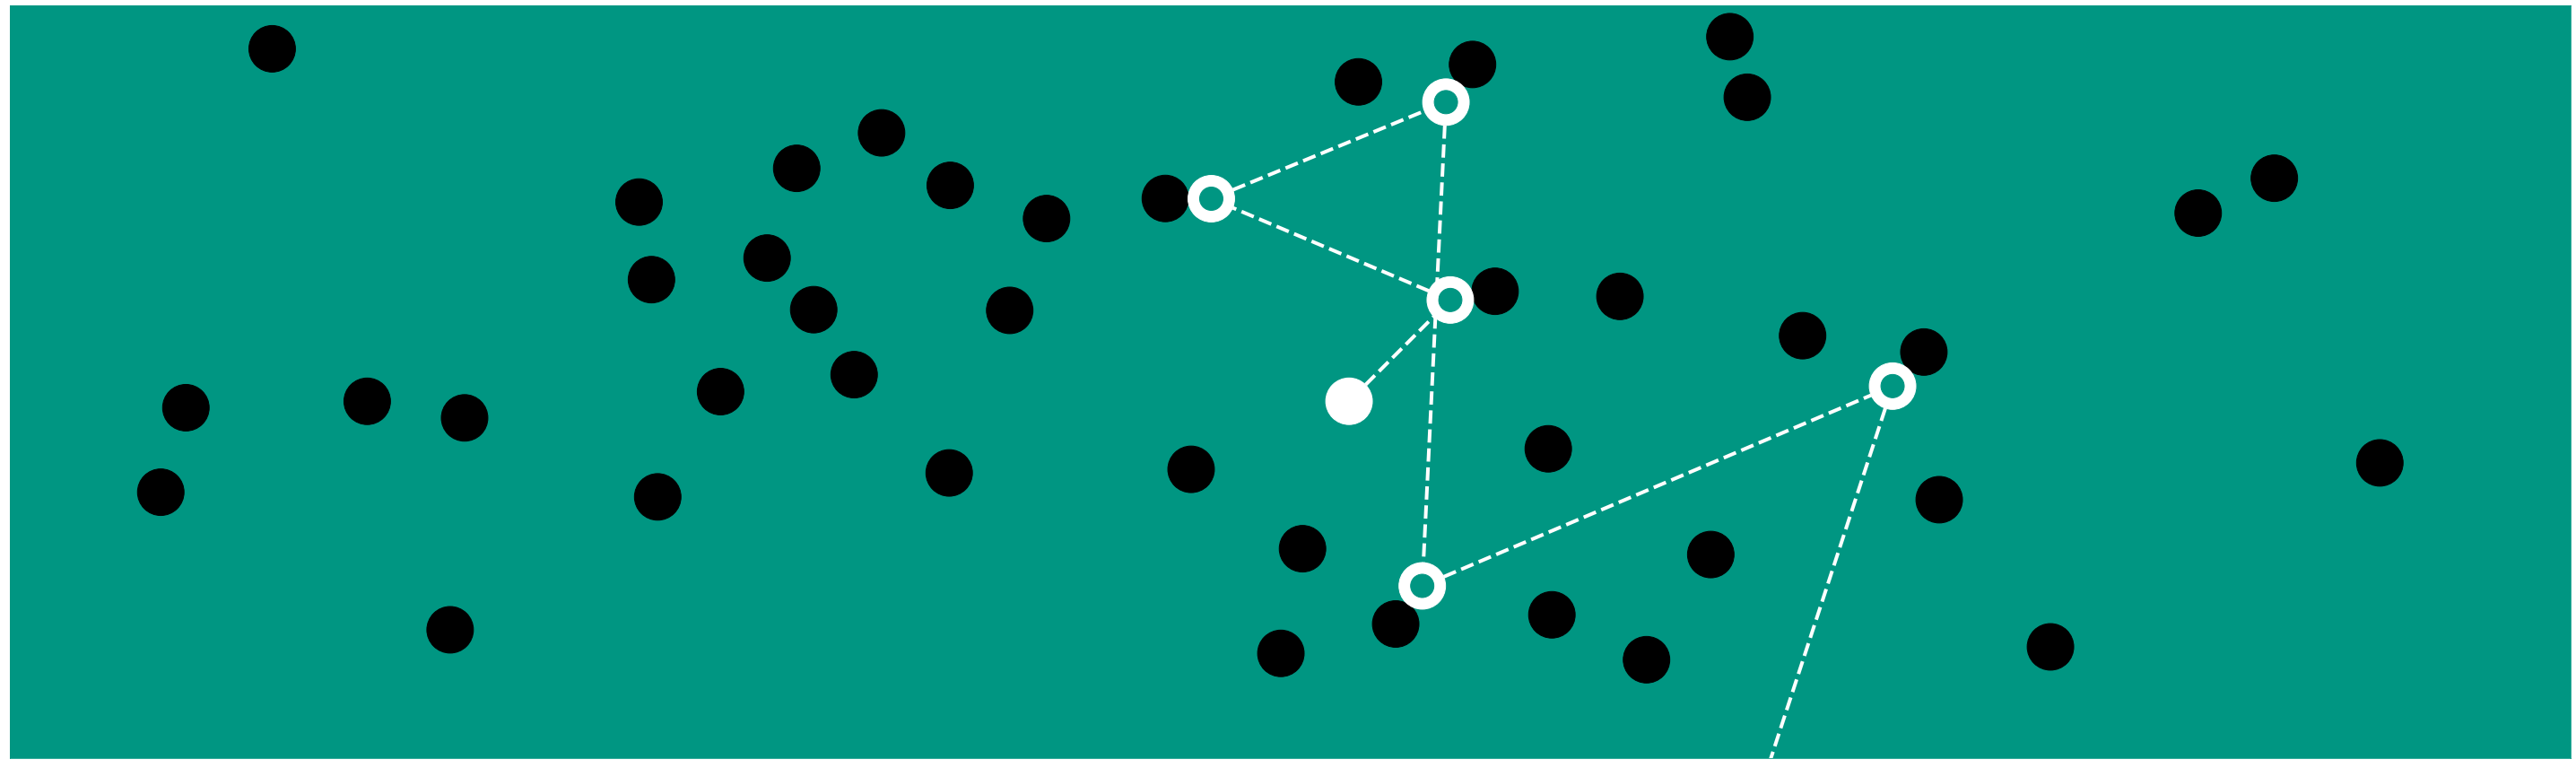

In [3]:
np.random.seed(3) # this looks like particles don't overlap
n = 20
x = np.random.rand(n)
y = np.random.rand(n)
np.random.seed(3) # this looks like particles don't overlap
x = np.append(x,np.random.rand(n)-0.5)
x = np.append(x,np.random.rand(n)+0.5)
y = np.append(y,np.random.rand(2*n))
color = ['black' for i in range(3*n)]
color[0] = 'white'

def collide(xi,yi,x,y,r):
    # assumes that we only collide with at most one other obstacle
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            return True
    else: 
        return False
def computenewvelo(xi,yi,vx,vy,x,y,r):
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            break        
    # collides with (xj,yj)
    v1 = np.array([vx,vy])
    v2 = np.array([0.0,0.0])
    x1 = np.array([xi,yi])
    x2 = np.array([xj,yj])
    
    v1prime = v1 - 2*(x1-x2)*np.dot(v1-v2,x1-x2)/np.dot(x1-x2,x1-x2)
    return v1prime[0],v1prime[1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,12)) 
ax.axis('equal')

[0,150,130]

ax.spines['bottom'].set_color((0,150/255,130/255))
ax.spines['top'].set_color((0,150/255,130/255)) 
ax.spines['right'].set_color((0,150/255,130/255))
ax.spines['left'].set_color((0,150/255,130/255))
d = 0.1
ax.set_xlim([-0.5-d,1.5+d])
ax.set_ylim([0,0.5+d])

x[8] -= 0.1
x[34] -= 0.1
x[55] -= 0.1
x[51] -= 0.1
r = 0.02
counter = 0
for xi,yi,ci in zip(x,y,color):
    circle1 = plt.Circle((xi,yi), r, color=ci)
    ax.add_artist(circle1)
   # ax.annotate(counter,(xi+0.1,yi))
   # counter +=1
   


    

dt = 0.001
vx = 1
vy = 1
nor = np.sqrt(vx**2+vy**2)
vx /= nor
vy /= nor

xi = x[0]
yi = y[0]
lastx = xi
lasty = yi
for _ in range(2000):
    xi = xi + dt*vx
    yi = yi + dt*vy
    
    if not collide(xi,yi,x,y,r):
        pass
    else:
        plt.plot([lastx+r*vx,xi-r*vx],[lasty+r*vy,yi-r*vy], 'w--', lw=4)
        circle1 = plt.Circle((xi,yi), r, color="white")
        ax.add_artist(circle1)
        circle1 = plt.Circle((xi,yi), r*0.5, color=(0,150/255,130/255))
        ax.add_artist(circle1)
        lastx = xi
        lasty = yi
        vx,vy = computenewvelo(xi,yi,vx,vy,x,y,r)
    if xi<0-d or xi>1+d or yi<0-d or yi>1+d:
        plt.plot([lastx+r*vx,xi],[lasty+r*vy,yi], 'w--', lw=4)
        break
        

ax = plt.gca()
ax.set_facecolor((0,150/255,130/255))
#c1 = plt.Circle((x[0],y[0]), r/4, color="k")
#ax.add_artist(c1)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_visible(False)
plt.tight_layout()
plt.savefig("particlebilliardtable.png",dpi=100)

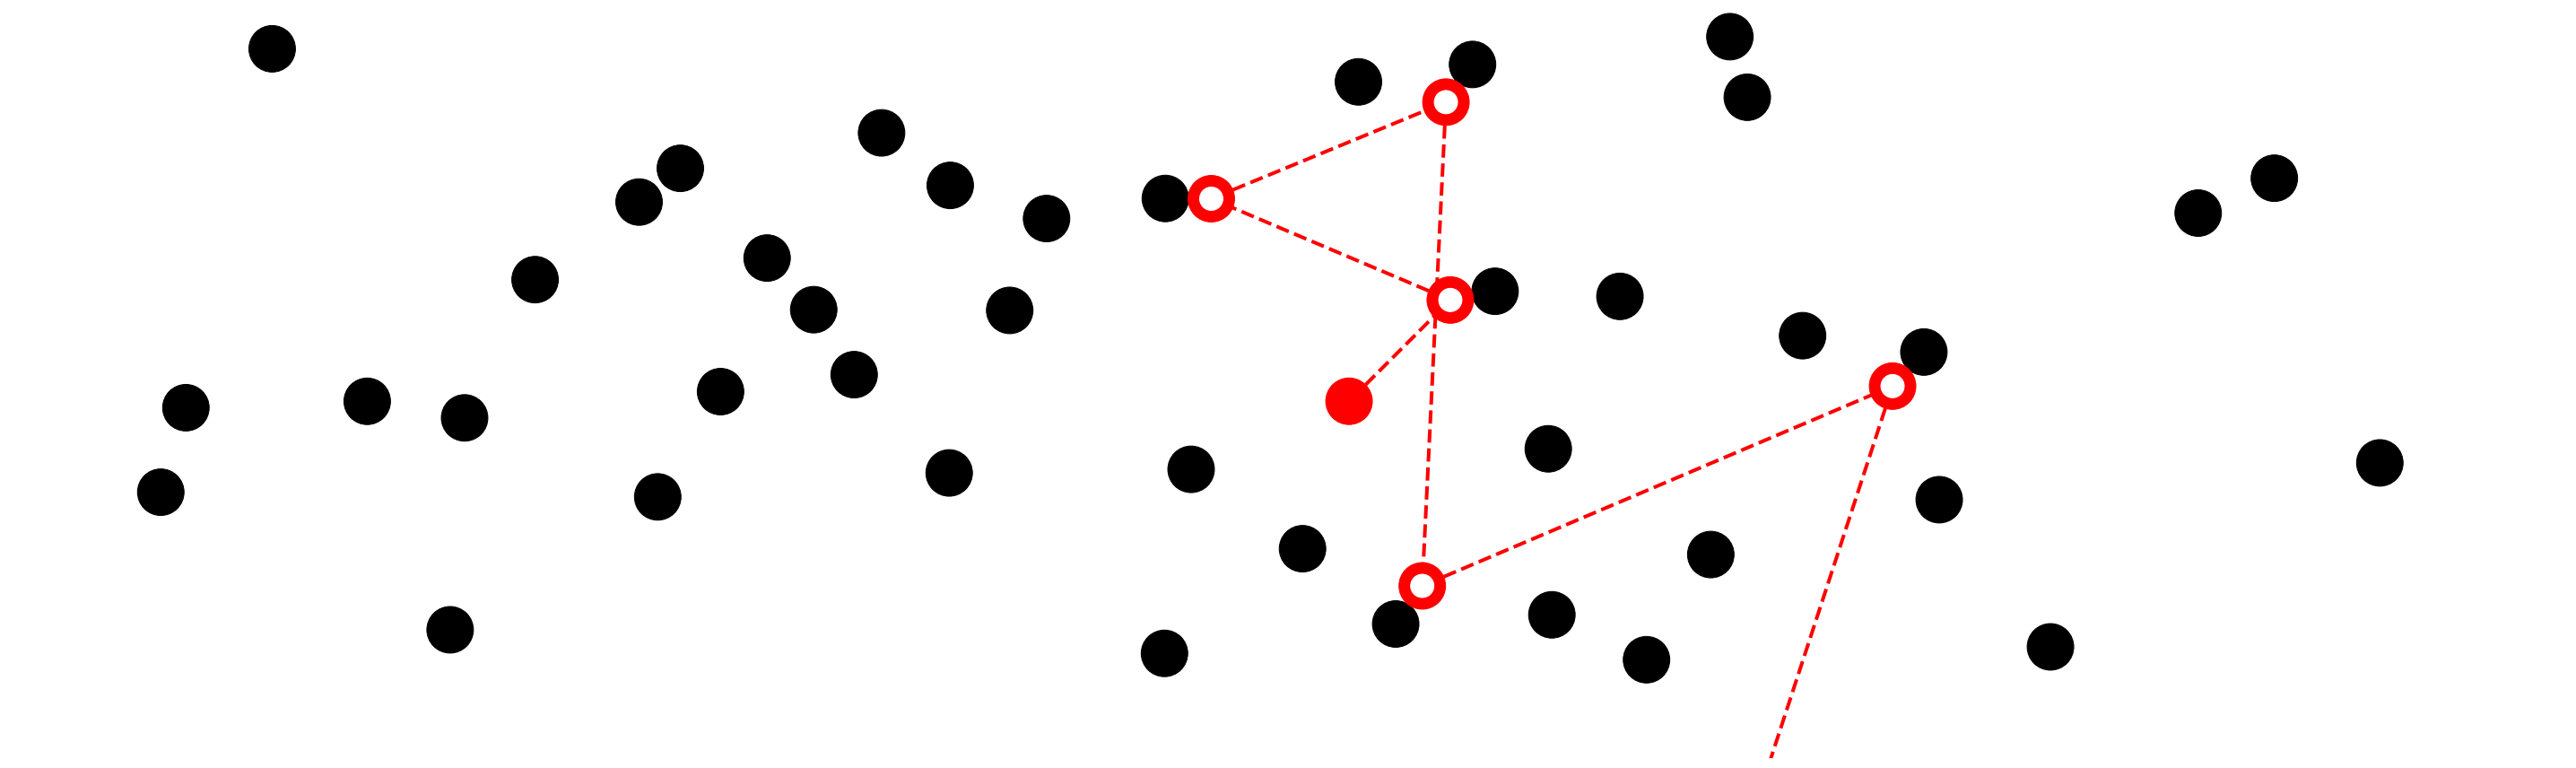

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,12)) 
ax.axis('equal')

[0,150,130]

ax.spines['bottom'].set_color("white")
ax.spines['top'].set_color("white")
ax.spines['right'].set_color("white")
ax.spines['left'].set_color("white")
d = 0.1
ax.set_xlim([-0.5-d,1.5+d])
ax.set_ylim([0,0.5+d])

x[8] -= 0.1
x[34] -= 0.1
x[55] -= 0.1
x[51] -= 0.1
r = 0.02
counter = 0
for xi,yi,ci in zip(x,y,color):
    circle1 = plt.Circle((xi,yi), r, color=ci)
    ax.add_artist(circle1)
   # ax.annotate(counter,(xi+0.1,yi))
   # counter +=1
   
circle1 = plt.Circle((x[0],y[0]), r, color="red")
ax.add_artist(circle1)

    

dt = 0.001
vx = 1
vy = 1
nor = np.sqrt(vx**2+vy**2)
vx /= nor
vy /= nor

xi = x[0]
yi = y[0]
lastx = xi
lasty = yi
for _ in range(2000):
    xi = xi + dt*vx
    yi = yi + dt*vy
    
    if not collide(xi,yi,x,y,r):
        pass
    else:
        plt.plot([lastx+r*vx,xi-r*vx],[lasty+r*vy,yi-r*vy], 'r--', lw=4)
        circle1 = plt.Circle((xi,yi), r, color="red")
        ax.add_artist(circle1)
        circle1 = plt.Circle((xi,yi), r*0.5, color=("white"))
        ax.add_artist(circle1)
        lastx = xi
        lasty = yi
        vx,vy = computenewvelo(xi,yi,vx,vy,x,y,r)
    if xi<0-d or xi>1+d or yi<0-d or yi>1+d:
        plt.plot([lastx+r*vx,xi],[lasty+r*vy,yi], 'r--', lw=4)
        break
        

ax = plt.gca()
ax.set_facecolor("white")
#c1 = plt.Circle((x[0],y[0]), r/4, color="k")
#ax.add_artist(c1)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_visible(False)
plt.tight_layout()
plt.savefig("particlebilliardtable_white.png",dpi=100)

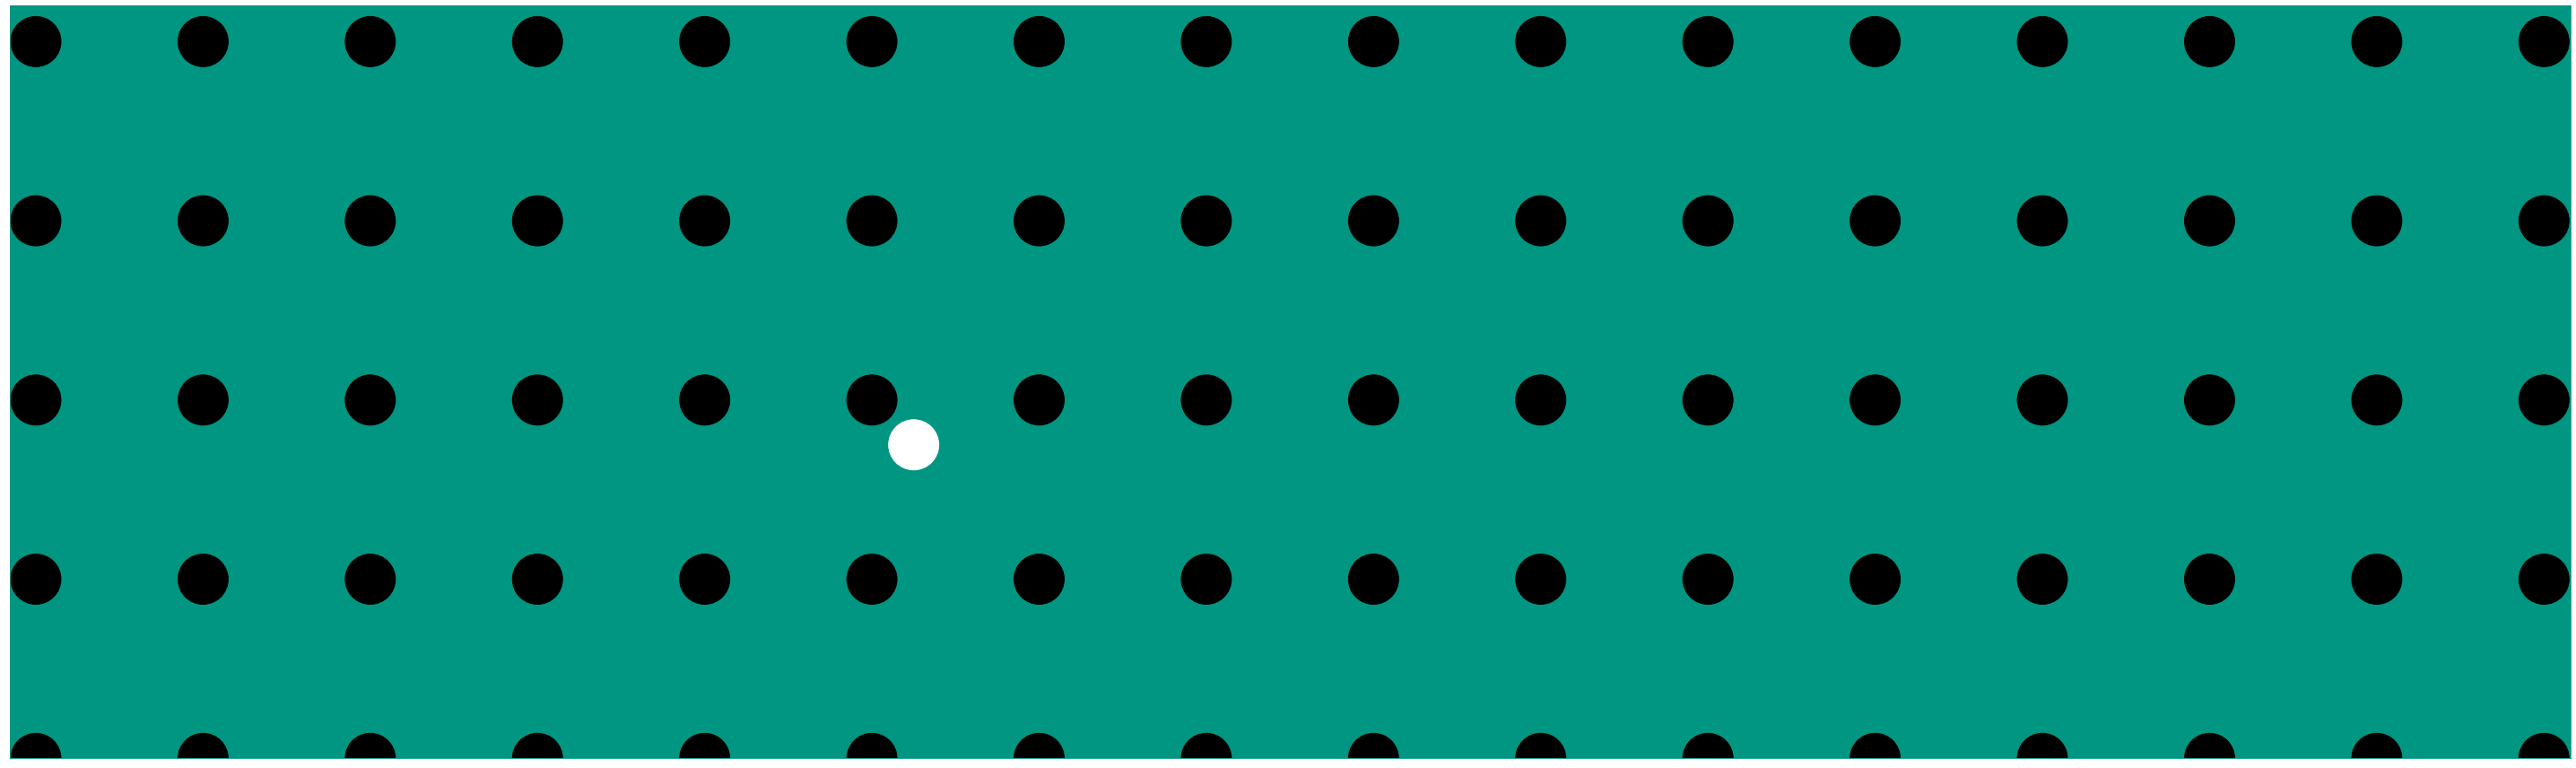

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,12)) 
ax.axis('equal')

[0,150,130]

ax.spines['bottom'].set_color((0,150/255,130/255))
ax.spines['top'].set_color((0,150/255,130/255)) 
ax.spines['right'].set_color((0,150/255,130/255))
ax.spines['left'].set_color((0,150/255,130/255))
d = 0.1
ax.set_xlim([-0.5-d,1.5+d])
ax.set_ylim([0,0.5+d])


x = np.linspace(-0.5,1.5,16)
y = np.linspace(0,1,8)
x,y = np.meshgrid(x,y)
x = x.flatten()
y = y.flatten()
n = y.size
color = ['black' for i in range(3*n)]

r = 0.02
counter = 0
for xi,yi,ci in zip(x,y,color):
    circle1 = plt.Circle((xi,yi), r, color=ci)
    ax.add_artist(circle1)
   # ax.annotate(counter,(xi+0.1,yi))
   # counter +=1
   


    

dt = 0.001
vx = 3.11
vy = -1
nor = np.sqrt(vx**2+vy**2)
vx /= nor
vy /= nor

xi = 0.2
yi = 0.25
circle1 = plt.Circle((xi,yi), r, color="white")
ax.add_artist(circle1)
lastx = xi
lasty = yi
for _ in range(0):
    xi = xi + dt*vx
    yi = yi + dt*vy
    
    if not collide(xi,yi,x,y,r):
        pass
    else:
        plt.plot([lastx+r*vx,xi-r*vx],[lasty+r*vy,yi-r*vy], 'w--', lw=4)
        circle1 = plt.Circle((xi,yi), r, color="white")
        ax.add_artist(circle1)
        circle1 = plt.Circle((xi,yi), r*0.5, color=(0,150/255,130/255))
        ax.add_artist(circle1)
        lastx = xi
        lasty = yi
        vx,vy = computenewvelo(xi,yi,vx,vy,x,y,r)
    if xi<0-d or xi>1.5+d or yi<0-d or yi>1+d:
        plt.plot([lastx+r*vx,xi],[lasty+r*vy,yi], 'w--', lw=4)
        break
        

ax = plt.gca()
ax.set_facecolor((0,150/255,130/255))
#c1 = plt.Circle((x[0],y[0]), r/4, color="k")
#ax.add_artist(c1)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_visible(False)
plt.tight_layout()
plt.savefig("ball_lattice_particlebilliardtable.png",dpi=100)

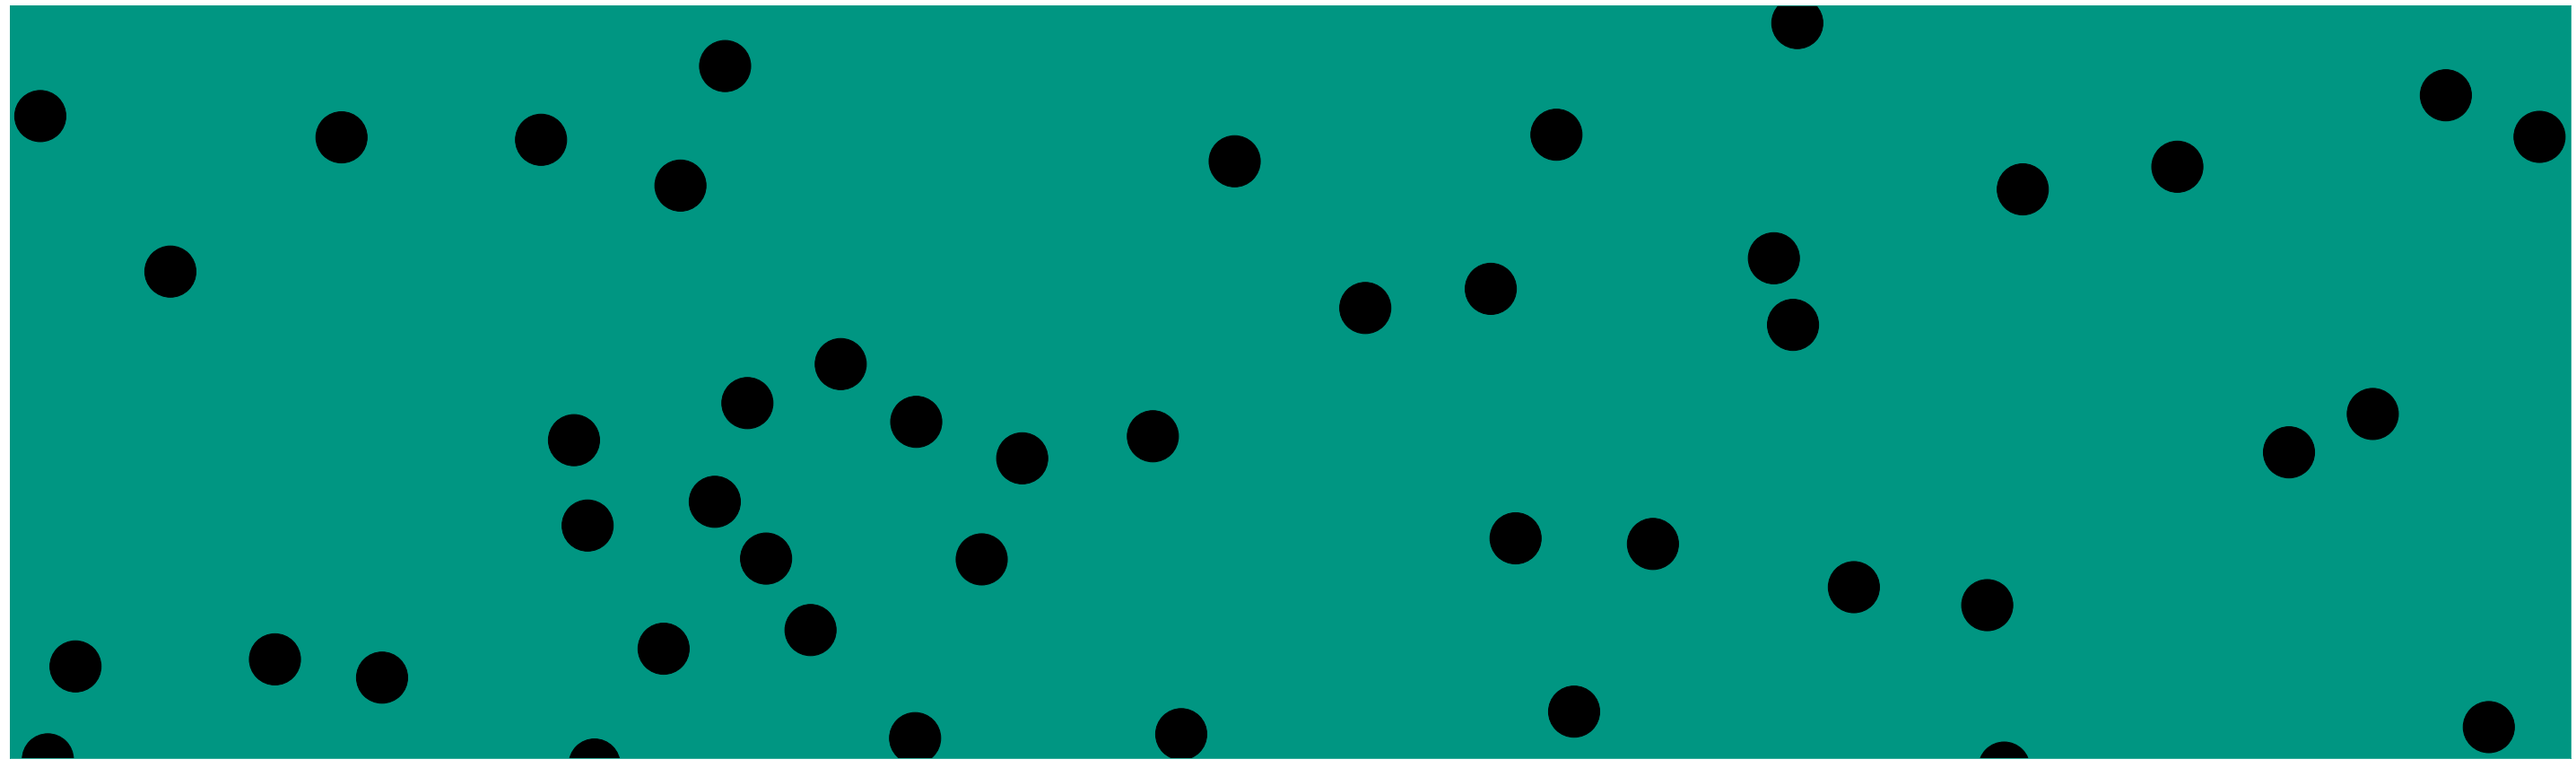

In [109]:
np.random.seed(3) # this looks like particles don't overlap
n = 20
x = np.random.rand(n)
y = np.random.rand(n)
np.random.seed(3) # this looks like particles don't overlap
x = np.append(x,np.random.rand(n)-0.5)
x = np.append(x,np.random.rand(n)+0.5)
y = np.append(y,np.random.rand(2*n))
color = ['black' for i in range(3*n)]
color[0] = 'white'

def collide(xi,yi,x,y,r):
    # assumes that we only collide with at most one other obstacle
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            return True
    else: 
        return False
def computenewvelo(xi,yi,vx,vy,x,y,r):
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            break        
    # collides with (xj,yj)
    v1 = np.array([vx,vy])
    v2 = np.array([0.0,0.0])
    x1 = np.array([xi,yi])
    x2 = np.array([xj,yj])
    
    v1prime = v1 - 2*(x1-x2)*np.dot(v1-v2,x1-x2)/np.dot(x1-x2,x1-x2)
    return v1prime[0],v1prime[1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,12)) 
ax.axis('equal')

[0,150,130]

ax.spines['bottom'].set_color((0,150/255,130/255))
ax.spines['top'].set_color((0,150/255,130/255)) 
ax.spines['right'].set_color((0,150/255,130/255))
ax.spines['left'].set_color((0,150/255,130/255))
d = 0.1
ax.set_xlim([-0.5-d,1.5+d])
ax.set_ylim([0,0.5+d])

x[8] -= 0.1
x[34] -= 0.1
x[55] -= 0.1
x[51] -= 0.1
r = 0.02
counter = 0
for xi,yi,ci in zip(x[1:],y[1:],color[1:]):
    circle1 = plt.Circle((xi,yi), r, color=ci)
    ax.add_artist(circle1)
   # ax.annotate(counter,(xi+0.1,yi))
   # counter +=1
   


    

dt = 0.001
vx = 1
vy = 1
nor = np.sqrt(vx**2+vy**2)
vx /= nor
vy /= nor

xi = x[0]
yi = y[0]
lastx = xi
lasty = yi

xi = x[0]
yi = y[0]
lastx = xi
lasty = yi

r = 0.08
#plt.plot([lastx+r*vx,xi],[lasty+r*vy,yi], 'w--', lw=4)
#plt.arrow(lastx,lasty,vx*r,vy*r,linestyle="-",color="w",lw = 4,width = 0.004)

ax = plt.gca()
ax.set_facecolor((0,150/255,130/255))
#c1 = plt.Circle((x[0],y[0]), r/4, color="k")
#ax.add_artist(c1)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_visible(False)
plt.tight_layout()
ax.set_xlim([-0.5,1.5])
ax.set_ylim([0,1.0])
plt.savefig("tableparticlebilliardtable.png",dpi=100)

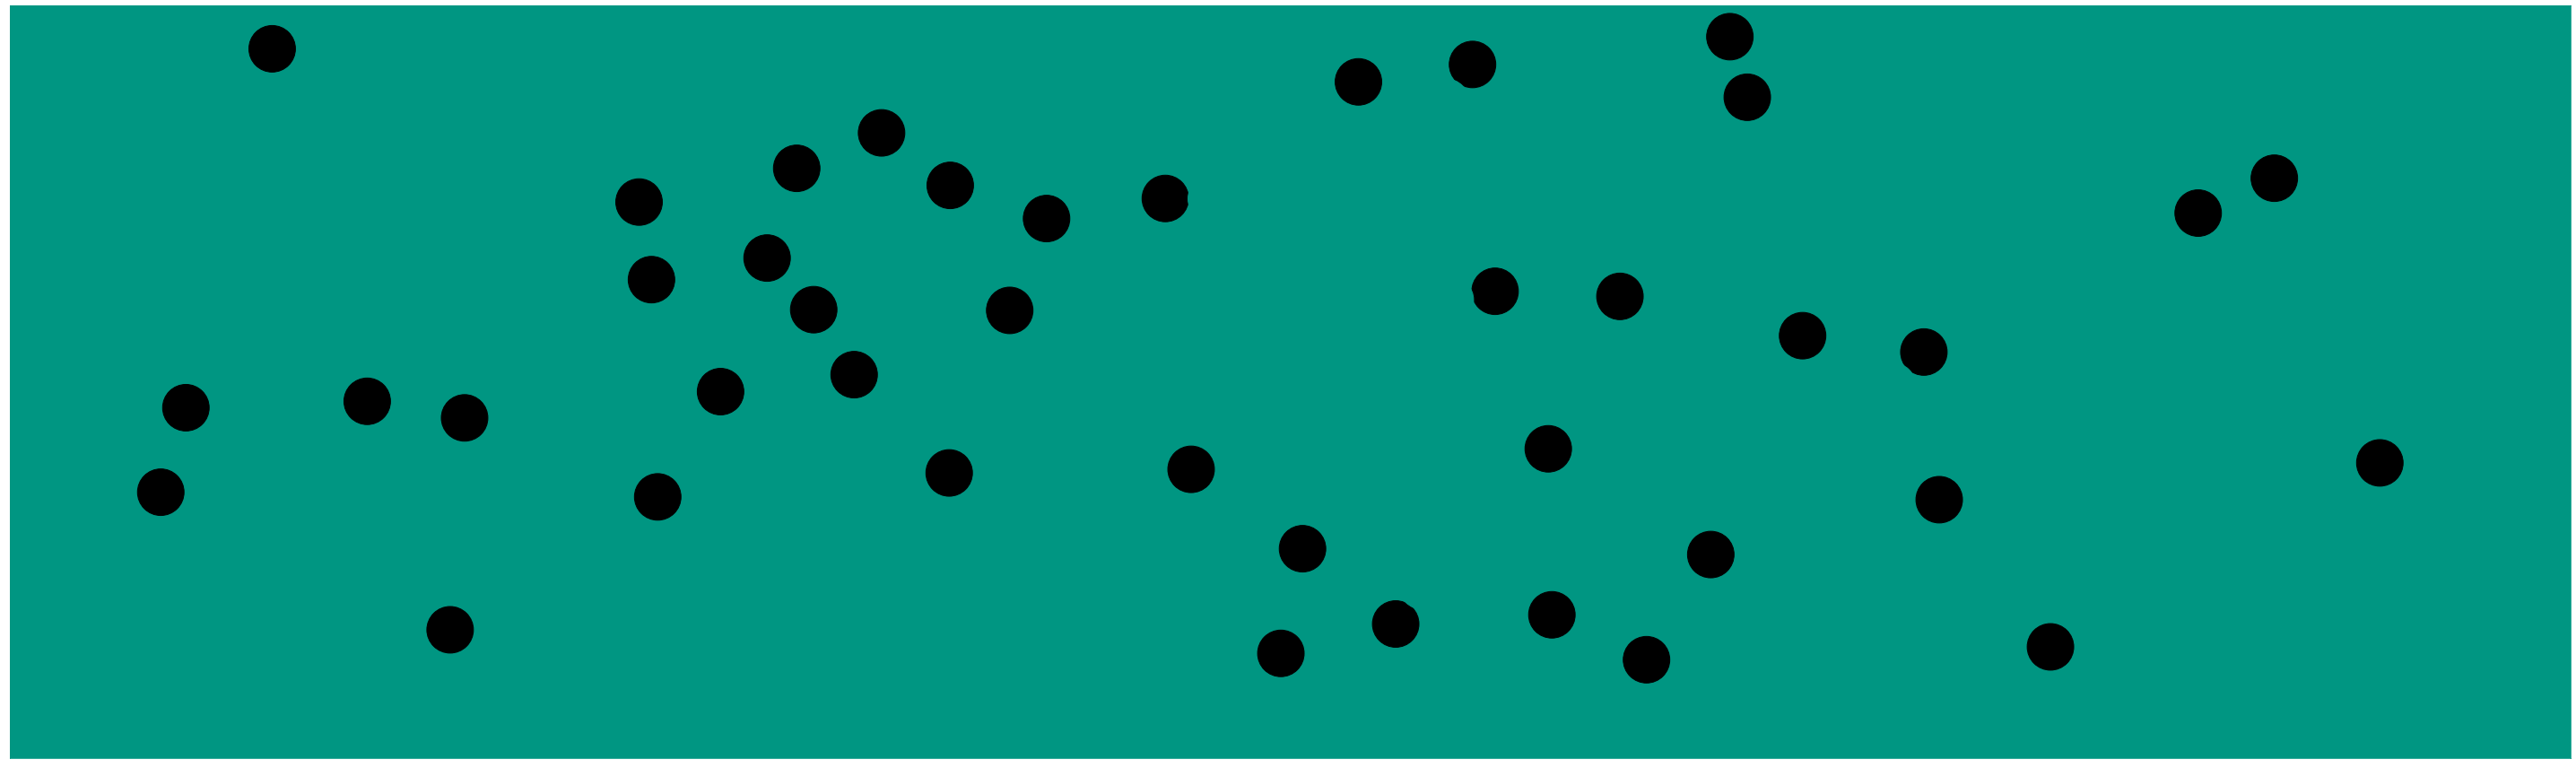

In [110]:
np.random.seed(3) # this looks like particles don't overlap
n = 20
x = np.random.rand(n)
y = np.random.rand(n)
np.random.seed(3) # this looks like particles don't overlap
x = np.append(x,np.random.rand(n)-0.5)
x = np.append(x,np.random.rand(n)+0.5)
y = np.append(y,np.random.rand(2*n))
color = ['black' for i in range(3*n)]
color[0] = 'white'

def collide(xi,yi,x,y,r):
    # assumes that we only collide with at most one other obstacle
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            return True
    else: 
        return False
def computenewvelo(xi,yi,vx,vy,x,y,r):
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            break        
    # collides with (xj,yj)
    v1 = np.array([vx,vy])
    v2 = np.array([0.0,0.0])
    x1 = np.array([xi,yi])
    x2 = np.array([xj,yj])
    
    v1prime = v1 - 2*(x1-x2)*np.dot(v1-v2,x1-x2)/np.dot(x1-x2,x1-x2)
    return v1prime[0],v1prime[1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,12)) 
ax.axis('equal')

[0,150,130]

ax.spines['bottom'].set_color((0,150/255,130/255))
ax.spines['top'].set_color((0,150/255,130/255)) 
ax.spines['right'].set_color((0,150/255,130/255))
ax.spines['left'].set_color((0,150/255,130/255))
d = 0.1
ax.set_xlim([-0.5-d,1.5+d])
ax.set_ylim([0,0.5+d])

x[8] -= 0.1
x[34] -= 0.1
x[55] -= 0.1
x[51] -= 0.1
r = 0.02
counter = 0
for xi,yi,ci in zip(x[1:],y[1:],color[1:]):
    circle1 = plt.Circle((xi,yi), r, color=ci)
    ax.add_artist(circle1)
   # ax.annotate(counter,(xi+0.1,yi))
   # counter +=1
   


    

dt = 0.001
vx = 1
vy = 1
nor = np.sqrt(vx**2+vy**2)
vx /= nor
vy /= nor

xi = x[0]
yi = y[0]
lastx = xi
lasty = yi
for _ in range(2000):
    xi = xi + dt*vx
    yi = yi + dt*vy
    
    if not collide(xi,yi,x,y,r):
        pass
    else:
        plt.plot([lastx+r*vx,xi-r*vx],[lasty+r*vy,yi-r*vy], 'w--', lw=0)
        circle1 = plt.Circle((xi,yi), r, color=(0,150/255,130/255))
        ax.add_artist(circle1)
        circle1 = plt.Circle((xi,yi), r*0.5, color=(0,150/255,130/255))
        ax.add_artist(circle1)
        lastx = xi
        lasty = yi
        vx,vy = computenewvelo(xi,yi,vx,vy,x,y,r)
    if xi<0-d or xi>1+d or yi<0-d or yi>1+d:
        plt.plot([lastx+r*vx,xi],[lasty+r*vy,yi], 'w--', lw=0)
        break
        

ax = plt.gca()
ax.set_facecolor((0,150/255,130/255))
#c1 = plt.Circle((x[0],y[0]), r/4, color="k")
#ax.add_artist(c1)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_visible(False)
plt.tight_layout()
plt.savefig("tableparticlebilliardtable.png",dpi=100)

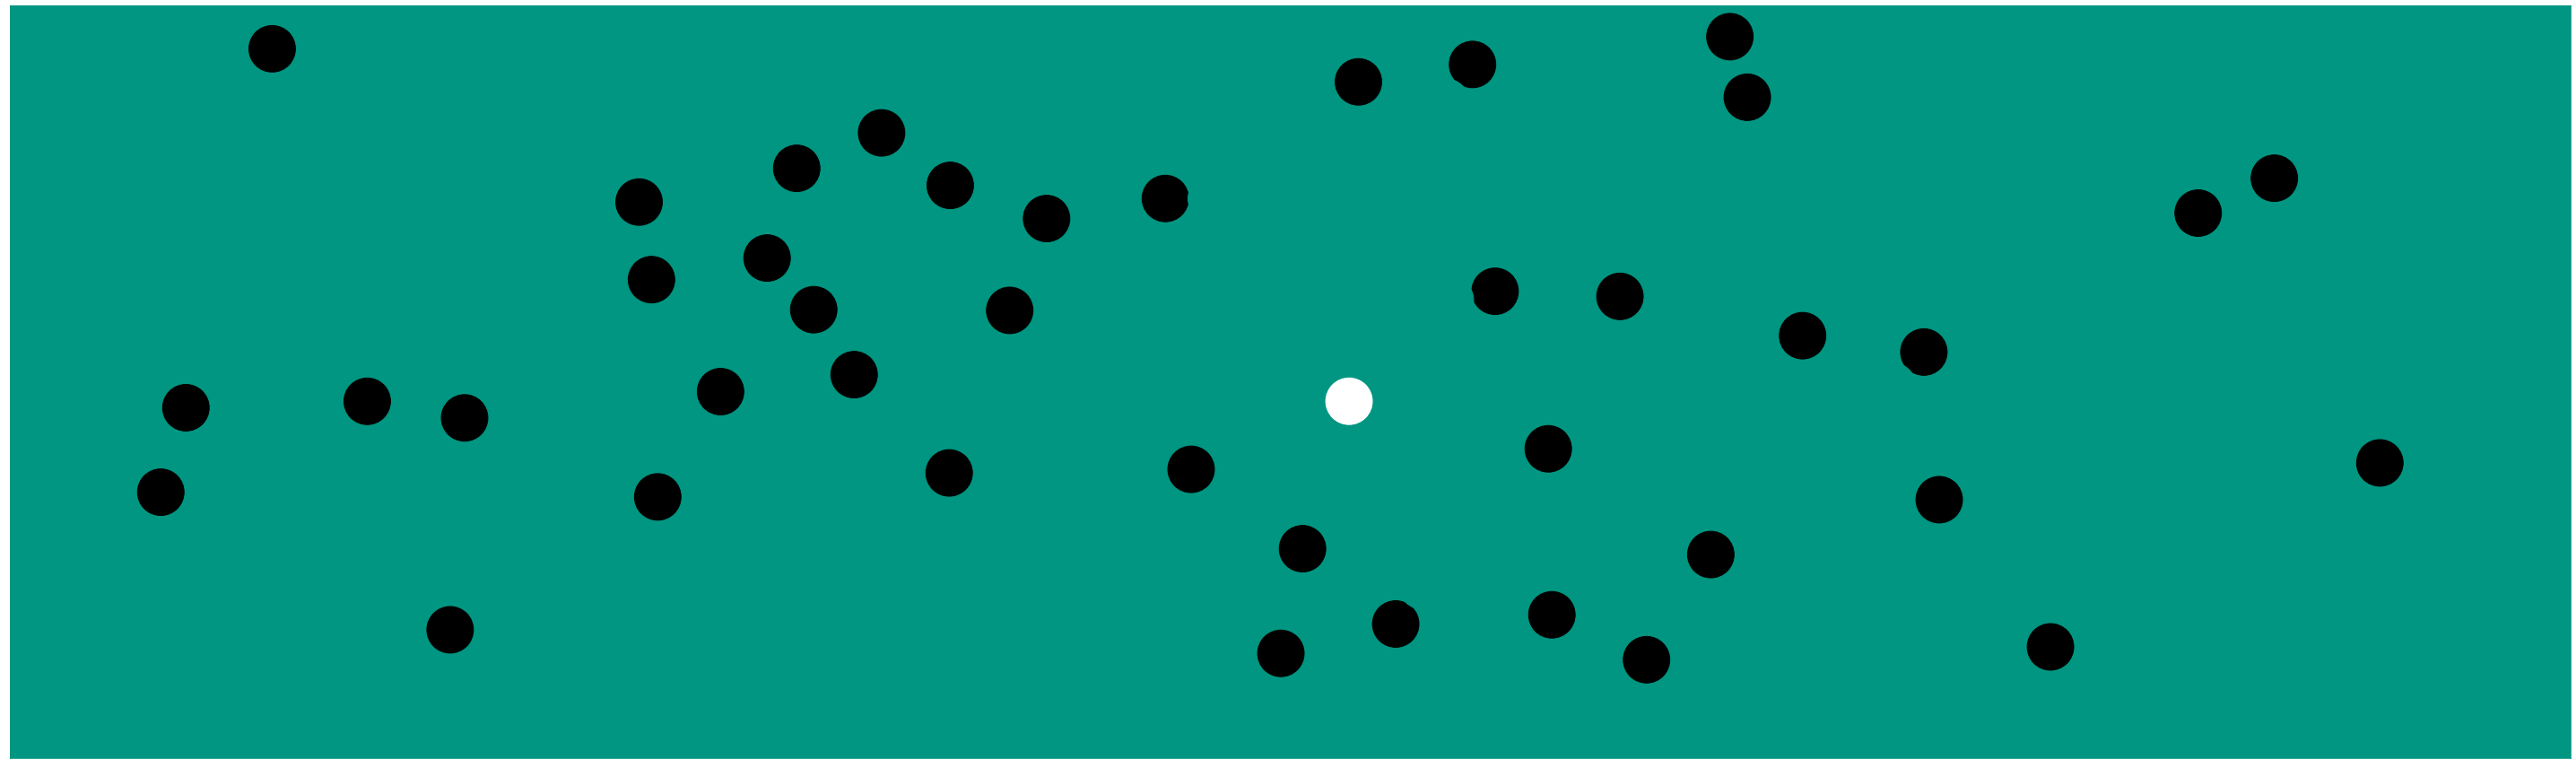

In [111]:
np.random.seed(3) # this looks like particles don't overlap
n = 20
x = np.random.rand(n)
y = np.random.rand(n)
np.random.seed(3) # this looks like particles don't overlap
x = np.append(x,np.random.rand(n)-0.5)
x = np.append(x,np.random.rand(n)+0.5)
y = np.append(y,np.random.rand(2*n))
color = ['black' for i in range(3*n)]
color[0] = 'white'

def collide(xi,yi,x,y,r):
    # assumes that we only collide with at most one other obstacle
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            return True
    else: 
        return False
def computenewvelo(xi,yi,vx,vy,x,y,r):
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            break        
    # collides with (xj,yj)
    v1 = np.array([vx,vy])
    v2 = np.array([0.0,0.0])
    x1 = np.array([xi,yi])
    x2 = np.array([xj,yj])
    
    v1prime = v1 - 2*(x1-x2)*np.dot(v1-v2,x1-x2)/np.dot(x1-x2,x1-x2)
    return v1prime[0],v1prime[1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,12)) 
ax.axis('equal')

[0,150,130]

ax.spines['bottom'].set_color((0,150/255,130/255))
ax.spines['top'].set_color((0,150/255,130/255)) 
ax.spines['right'].set_color((0,150/255,130/255))
ax.spines['left'].set_color((0,150/255,130/255))
d = 0.1
ax.set_xlim([-0.5-d,1.5+d])
ax.set_ylim([0,0.5+d])

x[8] -= 0.1
x[34] -= 0.1
x[55] -= 0.1
x[51] -= 0.1
r = 0.02
counter = 0
for xi,yi,ci in zip(x,y,color):
    circle1 = plt.Circle((xi,yi), r, color=ci)
    ax.add_artist(circle1)
   # ax.annotate(counter,(xi+0.1,yi))
   # counter +=1
   


    

dt = 0.001
vx = 1
vy = 1
nor = np.sqrt(vx**2+vy**2)
vx /= nor
vy /= nor

xi = x[0]
yi = y[0]
lastx = xi
lasty = yi
for _ in range(2000):
    xi = xi + dt*vx
    yi = yi + dt*vy
    
    if not collide(xi,yi,x,y,r):
        pass
    else:
        plt.plot([lastx+r*vx,xi-r*vx],[lasty+r*vy,yi-r*vy], 'w--', lw=0)
        circle1 = plt.Circle((xi,yi), r, color=(0,150/255,130/255))
        ax.add_artist(circle1)
        circle1 = plt.Circle((xi,yi), r*0.5, color=(0,150/255,130/255))
        ax.add_artist(circle1)
        lastx = xi
        lasty = yi
        vx,vy = computenewvelo(xi,yi,vx,vy,x,y,r)
    if xi<0-d or xi>1+d or yi<0-d or yi>1+d:
        plt.plot([lastx+r*vx,xi],[lasty+r*vy,yi], 'w--', lw=0)
        break
        

ax = plt.gca()
ax.set_facecolor((0,150/255,130/255))
#c1 = plt.Circle((x[0],y[0]), r/4, color="k")
#ax.add_artist(c1)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_visible(False)
plt.tight_layout()
plt.savefig("whiteball_tableparticlebilliardtable.png",dpi=100)